<a href="https://colab.research.google.com/github/shamrithy2020/GreenFuture_IMS_Data/blob/main/BookStore_Analysis_Shamrithy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 2**

# **1. Importing and Combing Dataset**

In [ ]:
#importing libraries

import pandas as pd


In [ ]:
#Import Both Datasets

url1 = "https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/section_02/bookstore_transactions(2).csv"
url2 = "https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/section_02/bookstore_transactions(1).csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)


In [ ]:
#Combine both dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)


#Check the length and duplicates
print(f"Combined records: {len(combined_df)}")
print(f"Duplicated records: {combined_df.duplicated().sum()}")


Combined records: 7000
Duplicated records: 3500


In [ ]:
#remove duplicates

cleaned_df = combined_df.drop_duplicates()

print(f"Records after removing duplicates: {len(cleaned_df)}")


Records after removing duplicates: 3500


In [ ]:
# To Demonstrate No Data Loss

print(f"Records in df1: {len(df1)}")
print(f"Records in df2: {len(df2)}")
print(f"Expected combined total: {len(df1) + len(df2)}")
print(f"Actual combined total: {len(combined_df)}")


Records in df1: 3500
Records in df2: 3500
Expected combined total: 7000
Actual combined total: 7000


# **2. Analyzing Data with NumPy and Pandas**

In [1]:
#Import Libraries & Load Data
import pandas as pd
import numpy as np

# Load the combined dataset (you can use the cleaned version from earlier)
url = "https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/section_02/bookstore_transactions(2).csv"
df = pd.read_csv(url)

# View the first 5 rows of the dataset
df.head()



,Transaction ID,Customer ID,Book Title,Author,Genre,Purchase Method,Payment Method,Stock Before,Stock After,Loyalty Points,Promotion Applied,Discount Applied,Order Status,Restock Triggered
0,59b278fe,914e0b,1984,George Orwell,Dystopian,Online,Cash,25,22,30,"Buy 3 Books, Get 1 Free",0,Completed,No
1,8f90d6f6,c8d80d,Becoming,Michelle Obama,Biography,Online,Online Payment,14,12,20,"Buy 3 Books, Get 1 Free",0,Completed,No
2,a116662e,dba9d8,The Midnight Library,Matt Haig,Fantasy,Online,Cash,21,18,30,"Buy 3 Books, Get 1 Free",0,Completed,No
3,2db9cc65,7cdf6c,Dune,Frank Herbert,Sci-Fi,Online,Cash,26,24,20,Flat 50% Discount,50,Completed,No
4,d99cc2d4,eb00af,Dune,Frank Herbert,Sci-Fi,Online,Card,6,5,10,"Buy One, Get One Free",0,Completed,No


In [2]:
#EDA

df['Book Title'].value_counts().head(5)


,count
Book Title,
Atomic Habits,376
The Midnight Library,362
Dune,354
The Silent Patient,353
The Catcher in the Rye,351


In [3]:
df['Genre'].value_counts()


,count
Genre,
Fantasy,713
Self-Help,376
Sci-Fi,354
Thriller,353
Classic,351
Biography,350
Memoir,339
Dystopian,338
Fiction,326


In [4]:
df['Purchase Method'].value_counts()


,count
Purchase Method,
Online,2406
In-Store,1094


In [5]:
import numpy as np
df['Loyalty Points'].describe()


,Loyalty Points
count,3500.000000
mean,13.631429
std,11.380109
min,0.000000
25%,0.000000
50%,10.000000
75%,20.000000
max,30.000000


In [6]:
df['Restock Triggered'].value_counts()


,count
Restock Triggered,
No,3366
Yes,134


In [7]:
df.groupby('Promotion Applied')['Discount Applied'].sum().sort_values(ascending=False)


,Discount Applied
Promotion Applied,
Flat 50% Discount,23150
"Buy 3 Books, Get 1 Free",0
"Buy One, Get One Free",0
Earn 2x Reward Points,0


In [9]:
average_drop = np.mean(df['Stock Before'] - df['Stock After'])
print("Average stock drop per transaction:", average_drop)



Average stock drop per transaction: 1.9925714285714287


In [ ]:
#Handling Missing Data

# Check for missing values
print(df.isnull().sum())

# Optionally fill or drop
# Fill missing values (example: with 0 or mean)
df_filled = df.fillna(0)

# OR Drop rows with missing values
df_dropped = df.dropna()


Transaction ID          0
Customer ID             0
Book Title              0
Author                  0
Genre                   0
Purchase Method         0
Payment Method          0
Stock Before            0
Stock After             0
Loyalty Points          0
Promotion Applied    1575
Discount Applied        0
Order Status            0
Restock Triggered       0
dtype: int64


In [ ]:
#Descriptive Statistics with Pandas & NumPy
print(df.describe())

# List of numeric columns
numeric_columns = ['Stock Before', 'Stock After', 'Loyalty Points', 'Promotion Applied', 'Discount Applied', 'Restock Triggered']

# Convert columns to numeric
for col in numeric_columns:
    df_filled[col] = pd.to_numeric(df_filled[col], errors='coerce')

    print(f"\nStatistics for {col}:")
    print(f"Mean: {df_filled[col].mean()}")
    print(f"Median: {df_filled[col].median()}")
    print(f"Standard Deviation: {df_filled[col].std()}")
    print(f"Min: {df_filled[col].min()}")
    print(f"Max: {df_filled[col].max()}")
    print(f"Quantiles:\n{df_filled[col].quantile([0.25, 0.5, 0.75])}")


       Stock Before  Stock After  Loyalty Points  Discount Applied
count   3500.000000  3500.000000     3500.000000       3500.000000
mean      27.763143    25.770571       13.631429          6.614286
std       13.149466    13.169317       11.380109         16.942477
min        5.000000     2.000000        0.000000          0.000000
25%       16.000000    14.000000        0.000000          0.000000
50%       28.000000    26.000000       10.000000          0.000000
75%       39.000000    37.000000       20.000000          0.000000
max       50.000000    49.000000       30.000000         50.000000

Statistics for Stock Before:
Mean: 27.763142857142856
Median: 28.0
Standard Deviation: 13.149465539084916
Min: 5
Max: 50
Quantiles:
0.25    16.0
0.50    28.0
0.75    39.0
Name: Stock Before, dtype: float64

Statistics for Stock After:
Mean: 25.77057142857143
Median: 26.0
Standard Deviation: 13.16931715087726
Min: 2
Max: 49
Quantiles:
0.25    14.0
0.50    26.0
0.75    37.0
Name: Stock After, dt

# **Creating Plots for Numerical Features**

In [ ]:
#Libraries Required

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the dataset

url = "https://raw.githubusercontent.com/shamrithy2020/GreenFuture_IMS_Data/main/section_02/bookstore_transactions(2).csv"
df = pd.read_csv(url)

# View the first 5 rows of the dataset
df.head()




,Transaction ID,Customer ID,Book Title,Author,Genre,Purchase Method,Payment Method,Stock Before,Stock After,Loyalty Points,Promotion Applied,Discount Applied,Order Status,Restock Triggered
0,59b278fe,914e0b,1984,George Orwell,Dystopian,Online,Cash,25,22,30,"Buy 3 Books, Get 1 Free",0,Completed,No
1,8f90d6f6,c8d80d,Becoming,Michelle Obama,Biography,Online,Online Payment,14,12,20,"Buy 3 Books, Get 1 Free",0,Completed,No
2,a116662e,dba9d8,The Midnight Library,Matt Haig,Fantasy,Online,Cash,21,18,30,"Buy 3 Books, Get 1 Free",0,Completed,No
3,2db9cc65,7cdf6c,Dune,Frank Herbert,Sci-Fi,Online,Cash,26,24,20,Flat 50% Discount,50,Completed,No
4,d99cc2d4,eb00af,Dune,Frank Herbert,Sci-Fi,Online,Card,6,5,10,"Buy One, Get One Free",0,Completed,No


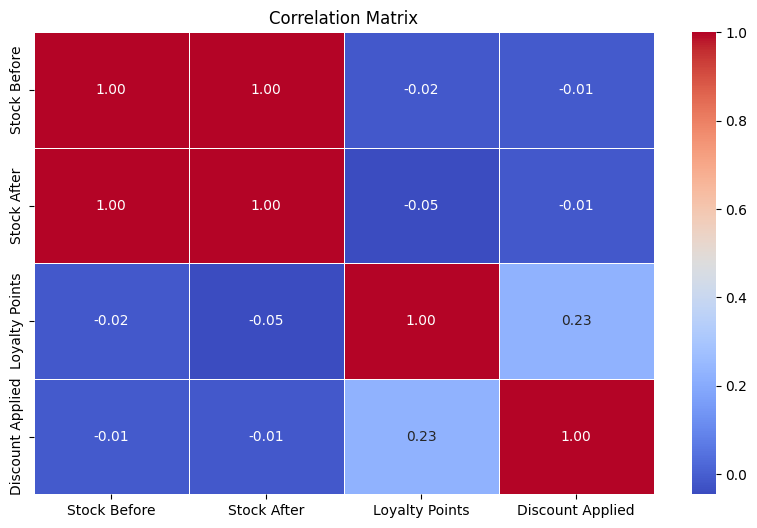

In [ ]:
#Correlation Matrix with Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


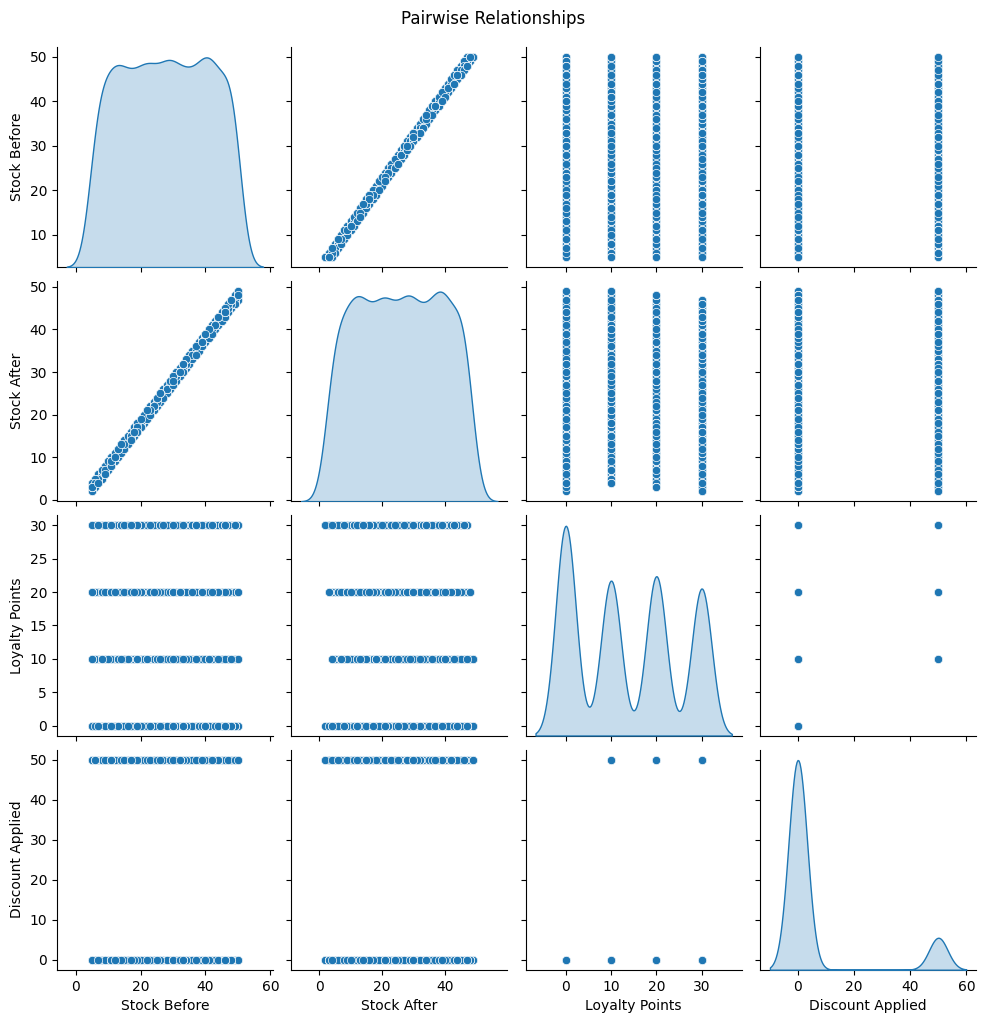

In [ ]:
#Pair Plot

sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


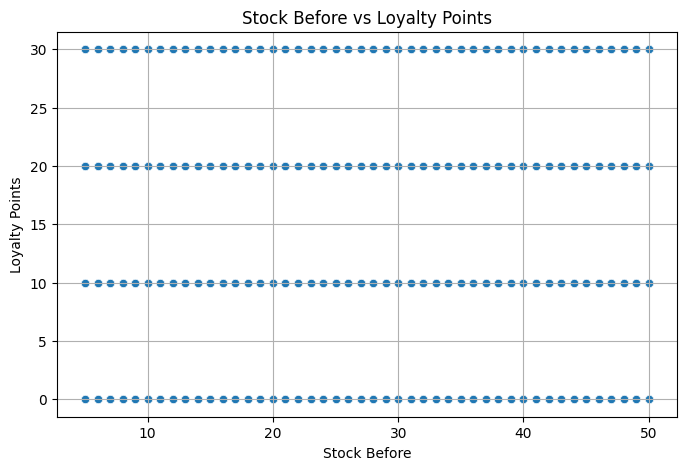

In [ ]:
#Scatter Plot for Selected Pairs
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Stock Before', y='Loyalty Points')
plt.title("Stock Before vs Loyalty Points")
plt.xlabel("Stock Before")
plt.ylabel("Loyalty Points")
plt.grid(True)
plt.show()


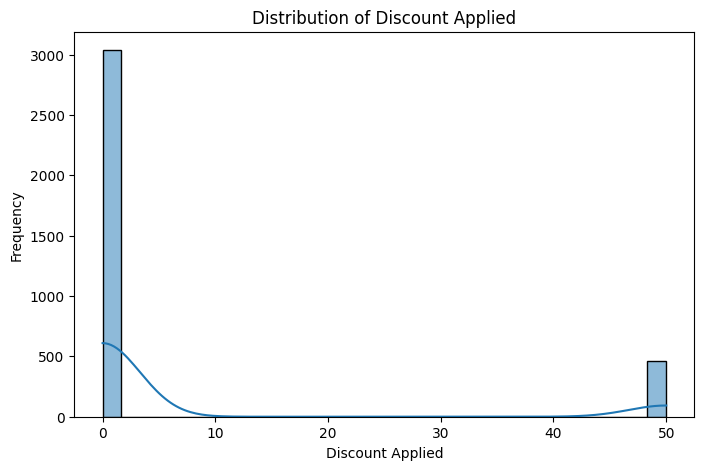

In [ ]:
#Histogram or KDE Plot (for Distribution of Single Features)
plt.figure(figsize=(8, 5))
sns.histplot(df['Discount Applied'], kde=True, bins=30)
plt.title("Distribution of Discount Applied")
plt.xlabel("Discount Applied")
plt.ylabel("Frequency")
plt.show()


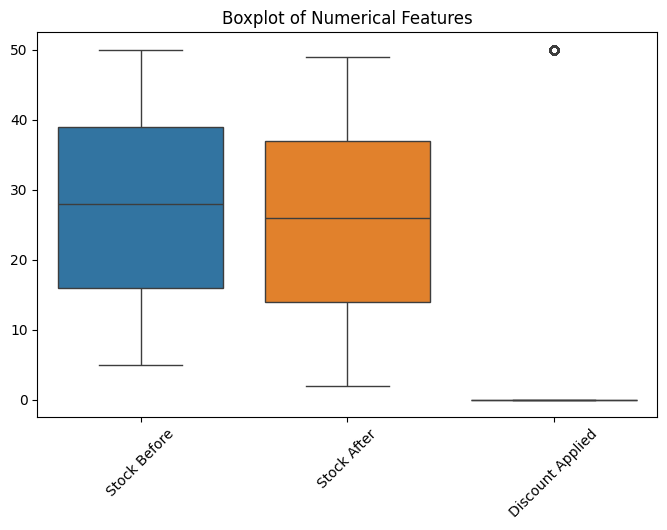

In [ ]:
#Boxplot to Detect Outliers

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Stock Before', 'Stock After', 'Discount Applied']])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()
